# Plotting

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pickle as pkl

In [29]:
names = ['DT Doubly robust',
         'DT T-learner',         
         'LR T-learner',
         'DL S-learner',
         'DT S-learner',
         'LR S-learner',
         'matching',
         'stablized IPW',
         'IPW',
         'naive ATE',]

In [30]:
results = []
for name in names:
    d = pkl.load(open(f'results/{name}', 'rb'))
    d['name'] = name
    results.append(d)
results = pd.DataFrame(results)
results = results.set_index('name')

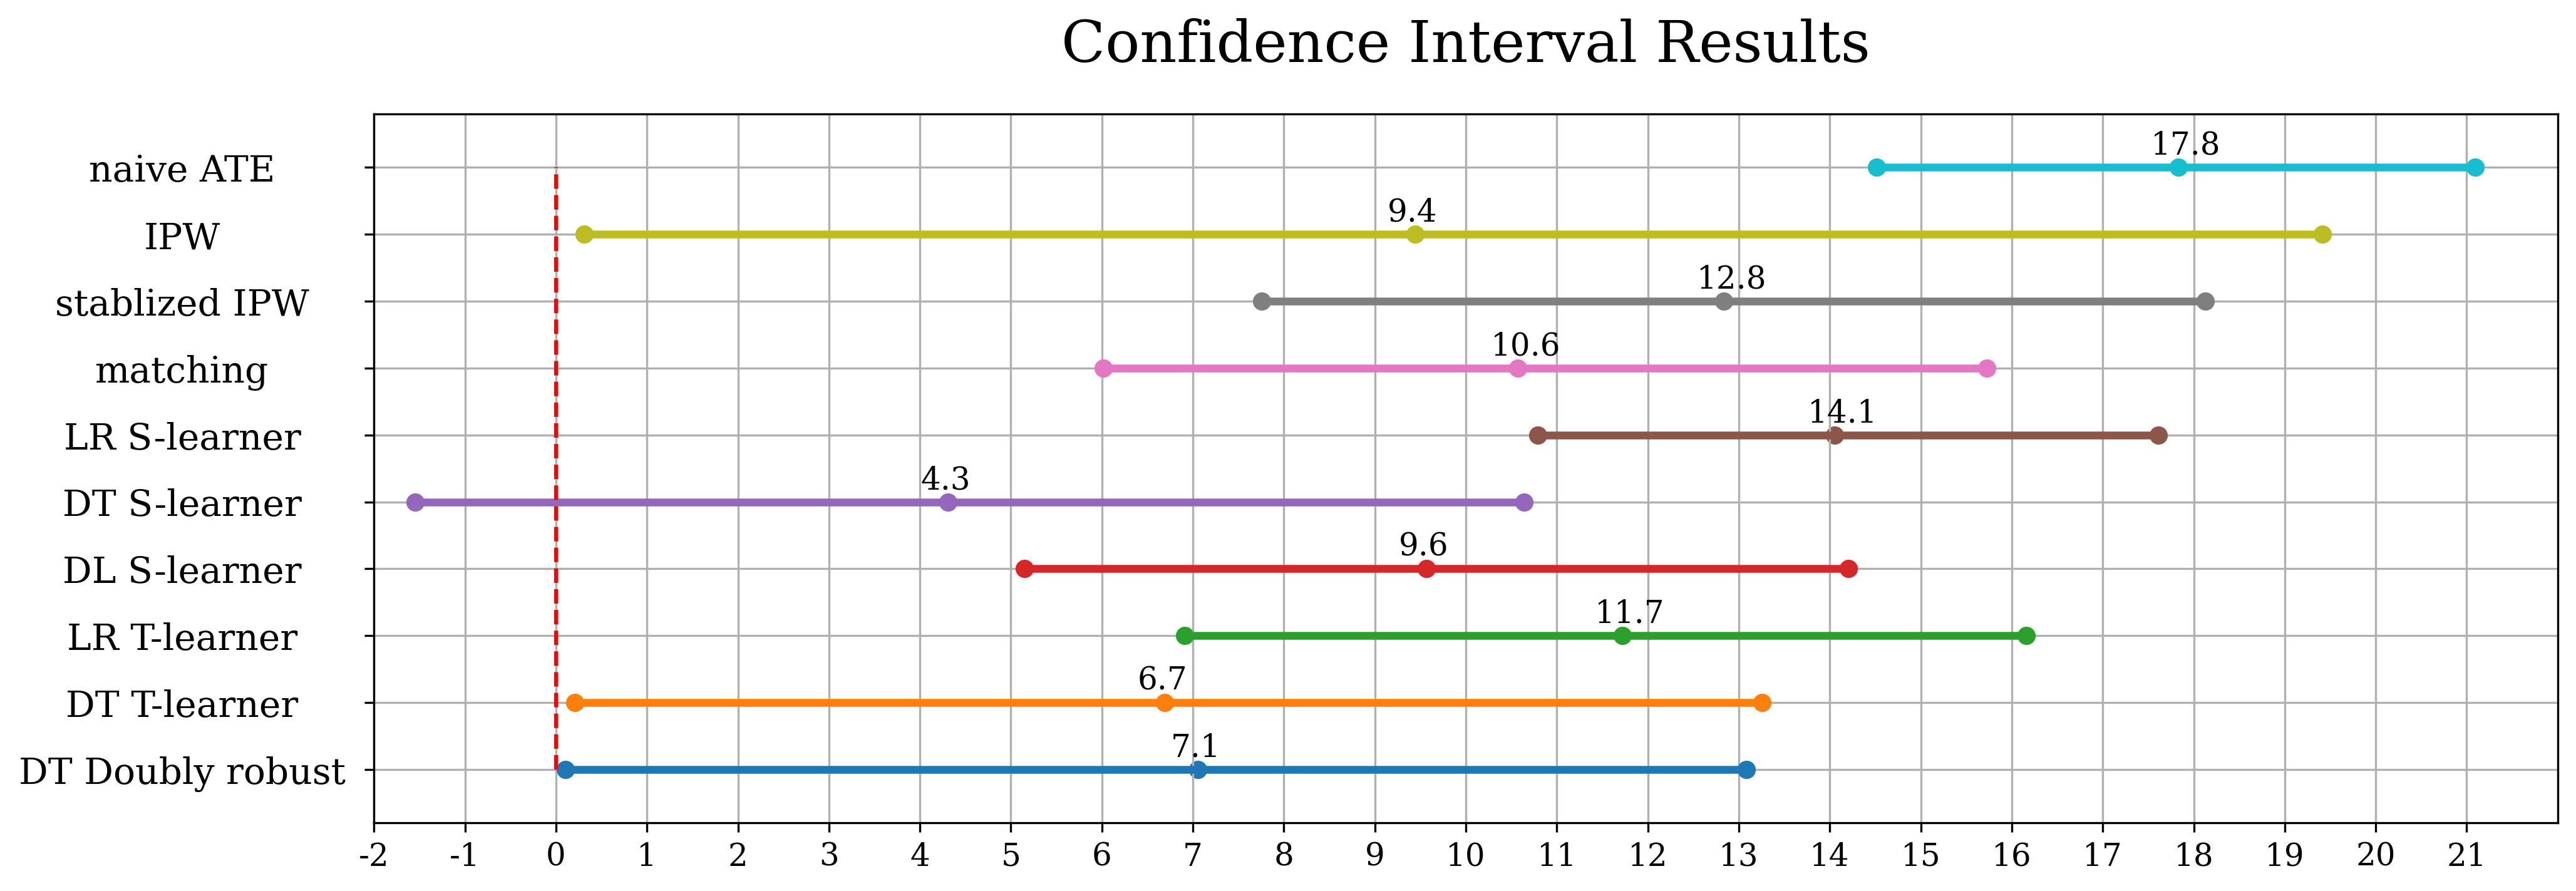

In [44]:
plt.figure(figsize=(15,5), dpi=300)
for i, (index, r) in enumerate(results.iterrows()):
    l, u, v = r['l'], r['u'], r['values']
    plt.plot((l,u), (i,i), 'o-', label=f"{i}) {index}", linewidth=3)
    m = np.median(v)
    plt.scatter(m, i)
    plt.text(m-0.3, i+0.2, round(m,1), fontsize=12, fontfamily='serif')
# plt.legend()
plt.plot((0,0),(0,9), 'r--')
plt.title("Confidence Interval Results", fontsize=22, pad=20, fontfamily='serif')
plt.tick_params(axis='y', pad=70)
plt.yticks(list(range(10)), results.index, ha='center', fontsize=14, fontfamily='serif')
lim = (-2, 22)
plt.xticks(range(*lim), range(*lim), fontsize=12, fontfamily='serif')
plt.xlim(*lim)
plt.ylim(-0.8,9.8)
plt.grid()
plt.savefig("plots/results")
plt.show()